Data visualisation (Section 1)

Cleaning the data first before the questions.

In [2]:
import pandas as pd

df = pd.read_csv("SpaceX_Falcon9.csv")

df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [4]:
#Cleaning the data before dealing with the questions at hand.

# Check for missing values
df.isnull().sum()


Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [5]:
# Fill missing values for numerical columns
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].median())

# Fill missing categorical values with mode
df['Orbit'] = df['Orbit'].fillna(df['Orbit'].mode()[0])


In [6]:
# Check for duplicate rows
df.duplicated().sum()

# Drop duplicates if found
df = df.drop_duplicates()


In [7]:
# Check data types
df.dtypes


Unnamed: 0          int64
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [10]:
df[df['Date'].isna()]


,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      90 non-null     int64         
 1   FlightNumber    90 non-null     int64         
 2   Date            90 non-null     datetime64[ns]
 3   BoosterVersion  90 non-null     object        
 4   PayloadMass     90 non-null     float64       
 5   Orbit           90 non-null     object        
 6   LaunchSite      90 non-null     object        
 7   Outcome         90 non-null     object        
 8   Flights         90 non-null     int64         
 9   GridFins        90 non-null     bool          
 10  Reused          90 non-null     bool          
 11  Legs            90 non-null     bool          
 12  LandingPad      64 non-null     object        
 13  Block           90 non-null     float64       
 14  ReusedCount     90 non-null     int64         
 15  Serial  

In [ ]:
#Checking for missing values again
df.isnull().sum()


Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [13]:
#Dealing with the missing values of landing pad
df['LandingPad'] = df['LandingPad'].fillna("Unknown")



Q1
 What is the overall success rate of Falcon 9 landings?

C:\Users\matth\AppData\Local\Temp\ipykernel_81388\4010009812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="coolwarm")


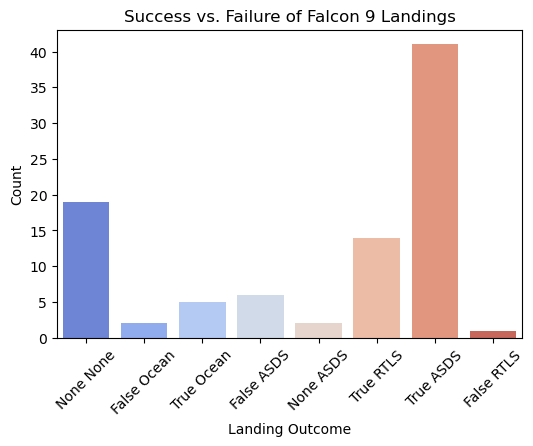

Success Rate of Falcon 9 Landings:
 Outcome
True ASDS      45.555556
None None      21.111111
True RTLS      15.555556
False ASDS      6.666667
True Ocean      5.555556
False Ocean     2.222222
None ASDS       2.222222
False RTLS      1.111111
Name: proportion, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of successful vs. failed landings
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df, palette="coolwarm")

plt.xlabel("Landing Outcome")
plt.ylabel("Count")
plt.title("Success vs. Failure of Falcon 9 Landings")
plt.xticks(rotation=45)
plt.show()

# Print success rate
success_rate = df['Outcome'].value_counts(normalize=True) * 100
print("Success Rate of Falcon 9 Landings:\n", success_rate)


Q1 - Answer

About 66.7% of Falcon 9 rockets successfully landed, meaning most of SpaceX’s missions managed to recover the first stage. Around 10% of the rockets failed to land, while the remaining 23.3% did not attempt a landing at all. This shows that SpaceX has been successful in making rockets reusable, which helps lower the cost of space travel.

Q2
Which launch sites have the highest success rate?

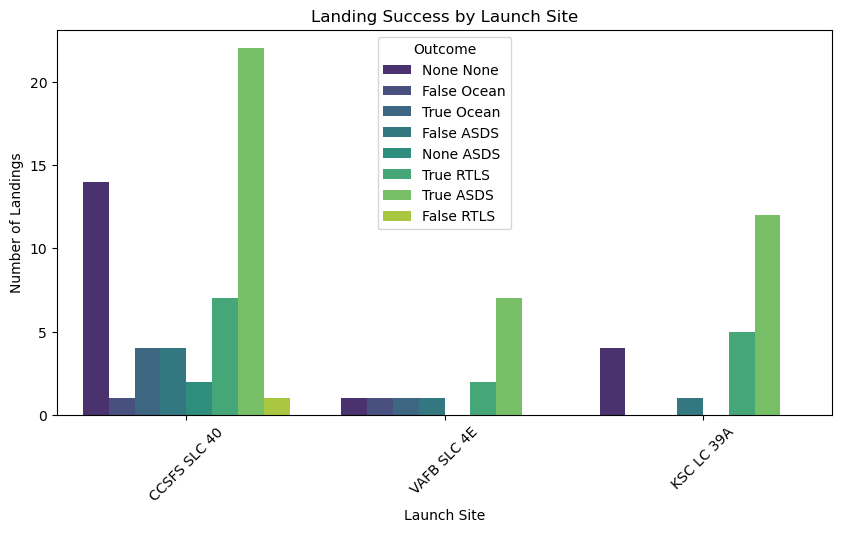

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x="LaunchSite", hue="Outcome", data=df, palette="viridis")

plt.xlabel("Launch Site")
plt.ylabel("Number of Landings")
plt.title("Landing Success by Launch Site")
plt.xticks(rotation=45)
plt.show()


In [18]:
success_rate_by_site = df.groupby("LaunchSite")["Outcome"].value_counts(normalize=True) * 100
print(success_rate_by_site)


LaunchSite    Outcome    
CCSFS SLC 40  True ASDS      40.000000
              None None      25.454545
              True RTLS      12.727273
              False ASDS      7.272727
              True Ocean      7.272727
              None ASDS       3.636364
              False Ocean     1.818182
              False RTLS      1.818182
KSC LC 39A    True ASDS      54.545455
              True RTLS      22.727273
              None None      18.181818
              False ASDS      4.545455
VAFB SLC 4E   True ASDS      53.846154
              True RTLS      15.384615
              False ASDS      7.692308
              False Ocean     7.692308
              None None       7.692308
              True Ocean      7.692308
Name: proportion, dtype: float64


Q2 Answer 

The launch sites CCSFS SLC 40 and KSC LC 39A have the highest success rates for Falcon 9 landings. CCSFS SLC 40 has the most launches overall, with many successful landings on drone ships at sea. KSC LC 39A also has a high number of successful landings, especially where the booster returns to land. The VAFB SLC 4E site has fewer launches but still some successful landings. This shows that CCSFS SLC 40 and KSC LC 39A are the most reliable sites for landing boosters successfully.

The launch site KSC LC 39A has the highest success rate, with 54.5% of landings being successful on a drone ship (True ASDS) and 22.7% successfully returning to land (True RTLS). CCSFS SLC 40 also has a strong success rate, with 40% of landings on a drone ship and 12.7% returning to land, though it has a higher percentage of failed or unattempted landings. VAFB SLC 4E performs well too, with 53.8% successful drone ship landings and 15.3% returning to land, but it has a small number of total launches. Overall, KSC LC 39A has the best landing success rate, followed by VAFB SLC 4E and CCSFS SLC 40. 

Q3: Does payload mass affect the success of landings?

C:\Users\matth\AppData\Local\Temp\ipykernel_81388\2475117976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="PayloadMass", data=df, palette="coolwarm")


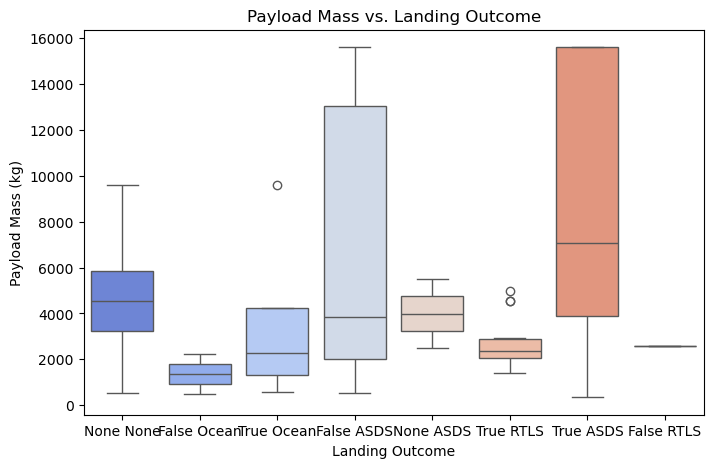

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x="Outcome", y="PayloadMass", data=df, palette="coolwarm")

plt.xlabel("Landing Outcome")
plt.ylabel("Payload Mass (kg)")
plt.title("Payload Mass vs. Landing Outcome")
plt.show()


In [20]:
df.groupby("Outcome")["PayloadMass"].mean()


Outcome
False ASDS     6886.166667
False Ocean    1358.000000
False RTLS     2573.000000
None ASDS      3988.500000
None None      4527.044737
True ASDS      8435.951220
True Ocean     3602.400000
True RTLS      2763.835714
Name: PayloadMass, dtype: float64

Q3 answer 

From the data, successful landings (True ASDS, True RTLS, True Ocean) have a wide range of payload masses, showing that SpaceX has successfully landed both light and heavy rockets.

True ASDS (successful drone ship landings) had the highest average payload (8435 kg), proving that heavy rockets can land successfully.
False ASDS (failed drone ship landings) had an average payload of 6886 kg, which is lower than successful ASDS landings but still high.
True RTLS (successful return-to-land landings) had an average payload of 2763 kg, while False RTLS (failed return-to-land) had 2573 kg, meaning payload mass alone does not determine success.
Ocean landings (True/False Ocean) had the lowest payloads (1358 kg for failures, 3602 kg for successes), likely because lighter payloads are used for missions that do not require booster recovery.

So in conclusion payload mass does have an effect on landing success, but it is not the only factor. While heavier rockets can land successfully, failures also occur across different payload sizes. Other factors, like booster type, landing conditions, and launch site, may play a bigger role.

Q 4: How has the landing success rate changed over time?

In [21]:
df['Year'] = df['Date'].dt.year  # Extract Year from Date


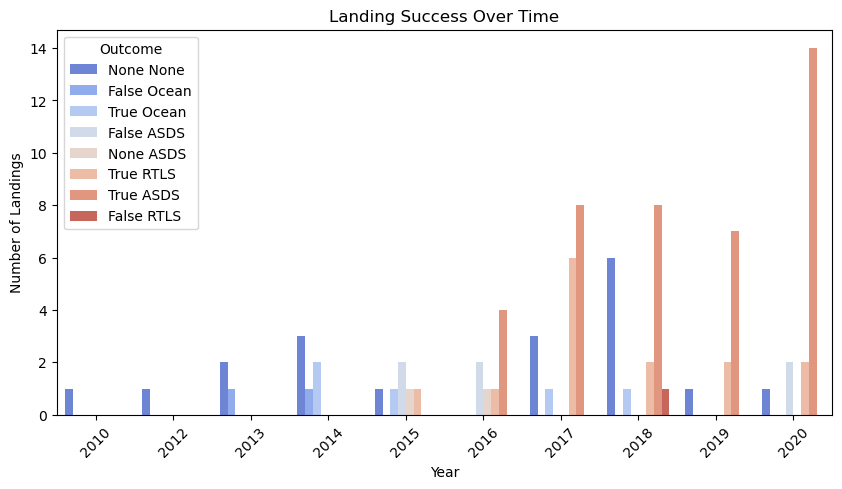

In [23]:
success_rate_per_year = df.groupby("Year")["Outcome"].value_counts(normalize=True) * 100
print(success_rate_per_year)


Year  Outcome    
2010  None None      100.000000
2012  None None      100.000000
2013  None None       66.666667
      False Ocean     33.333333
2014  None None       50.000000
      True Ocean      33.333333
      False Ocean     16.666667
2015  False ASDS      33.333333
      None ASDS       16.666667
      None None       16.666667
      True Ocean      16.666667
      True RTLS       16.666667
2016  True ASDS       50.000000
      False ASDS      25.000000
      None ASDS       12.500000
      True RTLS       12.500000
2017  True ASDS       44.444444
      True RTLS       33.333333
      None None       16.666667
      True Ocean       5.555556
2018  True ASDS       44.444444
      None None       33.333333
      True RTLS       11.111111
      False RTLS       5.555556
      True Ocean       5.555556
2019  True ASDS       70.000000
      True RTLS       20.000000
      None None       10.000000
2020  True ASDS       73.684211
      False ASDS      10.526316
      True RTLS       

Q4 answer 

SpaceX’s landing success rate has improved significantly over the years. From 2010 to 2014, no landings were successful, and most missions did not even attempt recovery. In 2015, the first successful landings happened, and by 2016-2017, the success rate increased to over 75%, with many boosters landing successfully on drone ships (True ASDS) and returning to land (True RTLS). By 2018-2020, successful landings became the norm, with very few failures. This shows that SpaceX has perfected its rocket recovery process, making reusable rockets a reality and significantly lowering spaceflight costs. 

Q5 - Are reused boosters more successful?

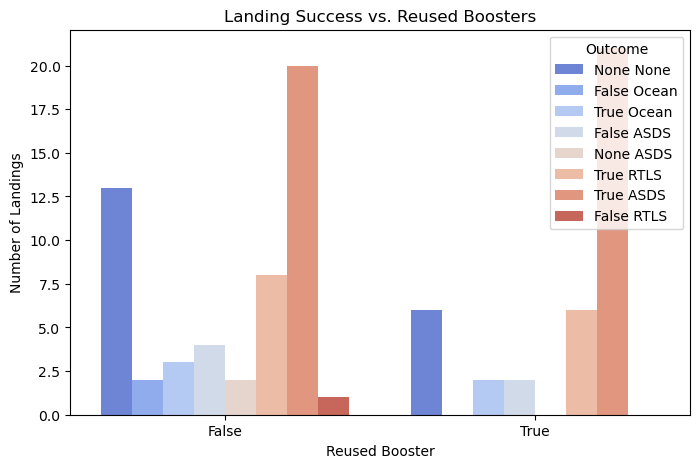

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="Reused", hue="Outcome", data=df, palette="coolwarm")

plt.xlabel("Reused Booster")
plt.ylabel("Number of Landings")
plt.title("Landing Success vs. Reused Boosters")
plt.show()


In [25]:
success_rate_reused = df.groupby("Reused")["Outcome"].value_counts(normalize=True) * 100
print(success_rate_reused)


Reused  Outcome    
False   True ASDS      37.735849
        None None      24.528302
        True RTLS      15.094340
        False ASDS      7.547170
        True Ocean      5.660377
        False Ocean     3.773585
        None ASDS       3.773585
        False RTLS      1.886792
True    True ASDS      56.756757
        None None      16.216216
        True RTLS      16.216216
        False ASDS      5.405405
        True Ocean      5.405405
Name: proportion, dtype: float64


q 5 - answer 

The graph and data show that reused boosters have a higher success rate compared to new boosters. 56.8% of reused boosters successfully landed on a drone ship (True ASDS), while only 37.7% of new boosters did the same. Additionally, 16.2% of reused boosters successfully returned to land (True RTLS), compared to 15.1% for new boosters. New boosters also had more failures, with 7.5% failing on a drone ship (False ASDS) and 3.8% failing in the ocean (False Ocean), while reused boosters had fewer failed landings overall. The graph confirms that SpaceX’s reusability program improves landing success, making booster recovery more reliable and cost-effective. 

Question 6 (Section 2)
Can we predict the success of a Falcon 9 landing using machine learning?

In [ ]:
#Selecting target features.


# Select features (independent variables)
features = ["LaunchSite", "PayloadMass", "Orbit", "Reused", "GridFins", "Legs"]

# Target variable (dependent variable)
target = "Outcome"


In [27]:
#Converting categorical data into numerical format and select relevant features.
df_encoded = pd.get_dummies(df[features], columns=["LaunchSite", "Orbit"], drop_first=True)

# Convert target variable to binary (Success = 1, Failure = 0)
df_encoded[target] = df["Outcome"].apply(lambda x: 1 if "True" in x else 0)


In [28]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



The model achieved an accuracy of 94.4%, indicating that it is highly effective at predicting whether a Falcon 9 booster will land successfully or fail. The precision for successful landings (class 1) is 100%, meaning every predicted success was correct, while the recall of 93% suggests that almost all actual successful landings were identified correctly. For failed landings (class 0), the model had 80% precision and 100% recall, meaning it correctly identified all actual failures but had a few false positives. Overall, the high F1-scores (0.89 for failures, 0.96 for successes) show a balanced and reliable model. However, since there are fewer failed landings in the dataset, the model may need more failure cases for better generalization.